In [76]:
# Import necessary libraries
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\engah\Desktop\Data Analyst project\Coffee shop sale\Coffee Shop Sales.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11 AM,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56 AM,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04 AM,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24 AM,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41 AM,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
# Convert transaction_date to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Create new columns for Year, Month, Day, and Total Sales
df['Year'] = df['transaction_date'].dt.year
df['Month'] = df['transaction_date'].dt.month
df['Day'] = df['transaction_date'].dt.day
df['Total_Sales'] = df['transaction_qty'] * df['unit_price']

# Display updated DataFrame
df.head()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Year,Month,Day,Total_Sales
0,1,2023-01-01,07:06:11 AM,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1,6.0
1,2,2023-01-01,07:08:56 AM,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,6.2
2,3,2023-01-01,07:14:04 AM,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,1,1,9.0
3,4,2023-01-01,07:20:24 AM,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,1,1,2.0
4,5,2023-01-01,07:22:41 AM,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,6.2


In [7]:
# Group by Year and Month, then calculate total sales
monthly_sales = df.groupby(['Year', 'Month']).agg(Total_Sales=('Total_Sales', 'sum')).reset_index()

# Calculate Previous Month Sales and MoM Percentage Change
monthly_sales['Prev_Month_Sales'] = monthly_sales['Total_Sales'].shift(1)
monthly_sales['Sales_Difference'] = monthly_sales['Total_Sales'] - monthly_sales['Prev_Month_Sales']
monthly_sales['MoM_Percentage_Change'] = (monthly_sales['Sales_Difference'] * 100) / monthly_sales['Prev_Month_Sales']

# Display the results
monthly_sales.head(10)


,Year,Month,Total_Sales,Prev_Month_Sales,Sales_Difference,MoM_Percentage_Change
0,2023,1,81677.74,NaN,NaN,NaN
1,2023,2,76145.19,81677.74,-5532.55,-6.773633
2,2023,3,98834.68,76145.19,22689.49,29.797667
3,2023,4,118941.08,98834.68,20106.40,20.343466
4,2023,5,156727.76,118941.08,37786.68,31.769242
5,2023,6,166485.88,156727.76,9758.12,6.226159


In [9]:
monthly_orders = df.groupby(['Year', 'Month']).agg(Total_Orders=('transaction_id', 'count')).reset_index()

# Calculate Previous Month Orders and MoM Percentage Change
monthly_orders['Prev_Month_Orders'] = monthly_orders['Total_Orders'].shift(1)
monthly_orders['Orders_Difference'] = monthly_orders['Total_Orders'] - monthly_orders['Prev_Month_Orders']
monthly_orders['MoM_Percentage_Change'] = (monthly_orders['Orders_Difference'] * 100) / monthly_orders['Prev_Month_Orders']

monthly_orders.head(10)


,Year,Month,Total_Orders,Prev_Month_Orders,Orders_Difference,MoM_Percentage_Change
0,2023,1,17314,NaN,NaN,NaN
1,2023,2,16359,17314.0,-955.0,-5.515768
2,2023,3,21229,16359.0,4870.0,29.769546
3,2023,4,25335,21229.0,4106.0,19.341467
4,2023,5,33527,25335.0,8192.0,32.334715
5,2023,6,35352,33527.0,1825.0,5.443374


In [11]:
daily_sales = df.groupby(['Year', 'Month', 'Day']).agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Quantity_Sold=('transaction_qty', 'sum'),
    Total_Orders=('transaction_id', 'nunique')
).reset_index()

# Display daily sales
daily_sales.head(10)


,Year,Month,Day,Total_Sales,Total_Quantity_Sold,Total_Orders
0,2023,1,1,2508.20,802,550
1,2023,1,2,2403.35,790,566
2,2023,1,3,2565.00,823,582
3,2023,1,4,2220.10,726,497
4,2023,1,5,2418.85,778,547
5,2023,1,6,2273.85,736,509
6,2023,1,7,2619.65,799,562
7,2023,1,8,2638.53,806,562
8,2023,1,9,2676.61,742,551
9,2023,1,10,2685.65,855,602


In [74]:
# Create a new column for Total Sales
df['Total_Sales'] = df['transaction_qty'] * df['unit_price']

# Calculate overall total sales
overall_total_sales = df['Total_Sales'].sum()
print(f"Overall Total Sales: ${overall_total_sales:,.2f}")


Overall Total Sales: $698,812.33


In [13]:
df['Day_of_Week'] = df['transaction_date'].dt.day_name()
df['Weekday_Weekend'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

sales_by_day = df.groupby('Weekday_Weekend').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Quantity_Sold=('transaction_qty', 'sum'),
    Total_Orders=('transaction_id', 'nunique')
).reset_index()

sales_by_day


,Weekday_Weekend,Total_Sales,Total_Quantity_Sold,Total_Orders
0,Weekday,503587.54,154674,107510
1,Weekend,195224.79,59796,41606


In [15]:
sales_by_location = df.groupby('store_location').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Quantity_Sold=('transaction_qty', 'sum'),
    Total_Orders=('transaction_id', 'nunique')
).reset_index()

sales_by_location.sort_values(by='Total_Sales', ascending=False).head()


,store_location,Total_Sales,Total_Quantity_Sold,Total_Orders
1,Hell's Kitchen,236511.17,71737,50735
0,Astoria,232243.91,70991,50599
2,Lower Manhattan,230057.25,71742,47782


In [17]:
daily_sales = df.groupby('transaction_date').agg(Total_Sales=('Total_Sales', 'sum')).reset_index()
average_daily_sales = daily_sales['Total_Sales'].mean()

daily_sales['Average_Daily_Sales'] = average_daily_sales
daily_sales.head(10)


,transaction_date,Total_Sales,Average_Daily_Sales
0,2023-01-01,2508.20,3860.841602
1,2023-01-02,2403.35,3860.841602
2,2023-01-03,2565.00,3860.841602
3,2023-01-04,2220.10,3860.841602
4,2023-01-05,2418.85,3860.841602
5,2023-01-06,2273.85,3860.841602
6,2023-01-07,2619.65,3860.841602
7,2023-01-08,2638.53,3860.841602
8,2023-01-09,2676.61,3860.841602
9,2023-01-10,2685.65,3860.841602


In [19]:
sales_by_category = df.groupby('product_category').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Quantity_Sold=('transaction_qty', 'sum'),
    Total_Orders=('transaction_id', 'nunique')
).reset_index()

sales_by_category.sort_values(by='Total_Sales', ascending=False)


,product_category,Total_Sales,Total_Quantity_Sold,Total_Orders
2,Coffee,269952.45,89250,58416
8,Tea,196405.95,69737,45449
0,Bakery,82315.64,23214,22796
4,Drinking Chocolate,72416.00,17457,11468
3,Coffee beans,40085.25,1828,1753
1,Branded,13607.00,776,747
6,Loose Tea,11213.60,1210,1210
5,Flavours,8408.80,10511,6790
7,Packaged Chocolate,4407.64,487,487


In [21]:
top_products = df.groupby(['product_id', 'product_detail']).agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Quantity_Sold=('transaction_qty', 'sum'),
    Total_Orders=('transaction_id', 'nunique')
).reset_index()

top_products = top_products.sort_values(by='Total_Sales', ascending=False).head(10)
top_products


,product_id,product_detail,Total_Sales,Total_Quantity_Sold,Total_Orders
60,61,Sustainably Grown Organic Lg,21151.75,4453,2961
58,59,Dark chocolate Lg,21006.00,4668,3029
38,39,Latte Rg,19112.25,4497,2896
40,41,Cappuccino Lg,17641.75,4151,2772
54,55,Morning Sunrise Chai Lg,17384.00,4346,2830
37,38,Latte,17257.50,4602,2990
35,36,Jamaican Coffee River Lg,16481.25,4395,2911
59,60,Sustainably Grown Organic Rg,16233.75,4329,2842
39,40,Cappuccino,15997.50,4266,2793
26,27,Brazilian Lg,15109.50,4317,2771


In [26]:
df['Hour_of_Day'] = pd.to_datetime(df['transaction_time']).dt.hour

sales_by_hour = df.groupby(['Day_of_Week', 'Hour_of_Day']).agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Quantity_Sold=('transaction_qty', 'sum'),
    Total_Orders=('transaction_id', 'nunique')
).reset_index()

sales_by_hour.sort_values(by=['Day_of_Week', 'Hour_of_Day']).head(20)


C:\Users\engah\AppData\Local\Temp\ipykernel_32384\2998638884.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour_of_Day'] = pd.to_datetime(df['transaction_time']).dt.hour


,Day_of_Week,Hour_of_Day,Total_Sales,Total_Quantity_Sold,Total_Orders
0,Friday,6,3385.73,1058,707
1,Friday,7,9386.04,2884,1989
2,Friday,8,11746.65,3641,2544
3,Friday,9,12750.00,3847,2707
4,Friday,10,13155.66,3997,2761
5,Friday,11,6827.84,2019,1405
6,Friday,12,5685.49,1795,1231
7,Friday,13,5499.49,1698,1199
8,Friday,14,5840.33,1847,1265
9,Friday,15,6098.13,1858,1295


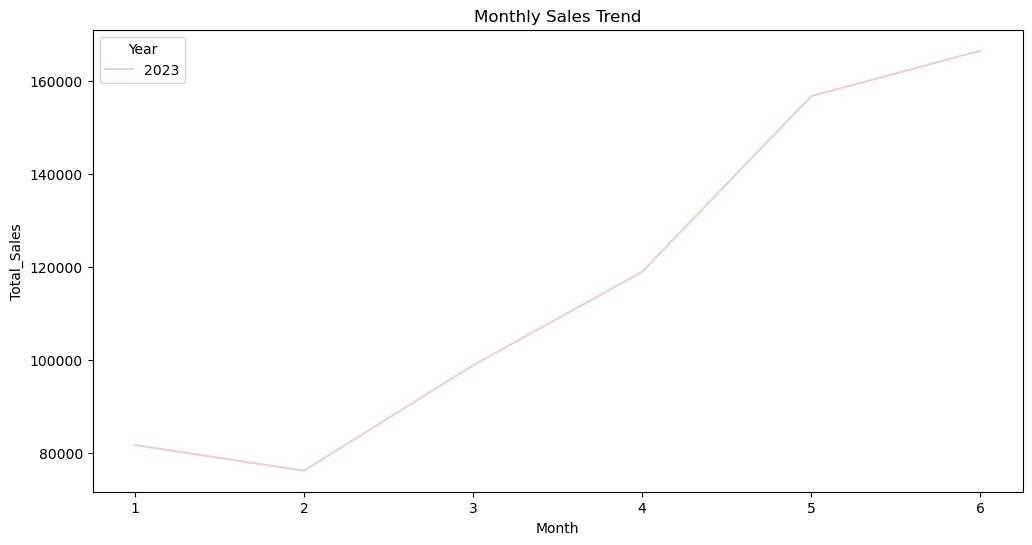

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', hue='Year')
plt.title('Monthly Sales Trend')
plt.show()


In [30]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


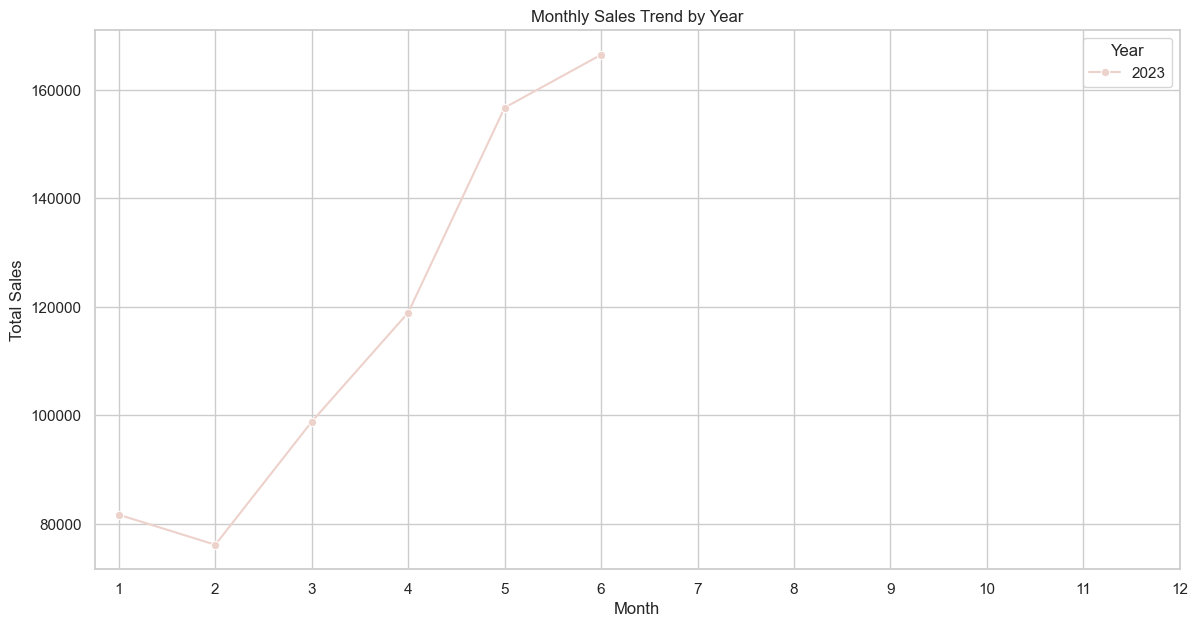

In [32]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.show()


In [40]:
# Create a pivot table for heatmap
daily_sales_pivot = daily_sales.pivot_table(index='Month', columns='Day', values='Total_Sales', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(daily_sales_pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Daily Sales Heatmap')
plt.show()


KeyError: 'Month'

In [42]:
print(daily_sales.columns)


Index(['transaction_date', 'Total_Sales', 'Average_Daily_Sales'], dtype='object')


In [44]:
print(daily_sales.head())


  transaction_date  Total_Sales  Average_Daily_Sales
0       2023-01-01      2508.20          3860.841602
1       2023-01-02      2403.35          3860.841602
2       2023-01-03      2565.00          3860.841602
3       2023-01-04      2220.10          3860.841602
4       2023-01-05      2418.85          3860.841602


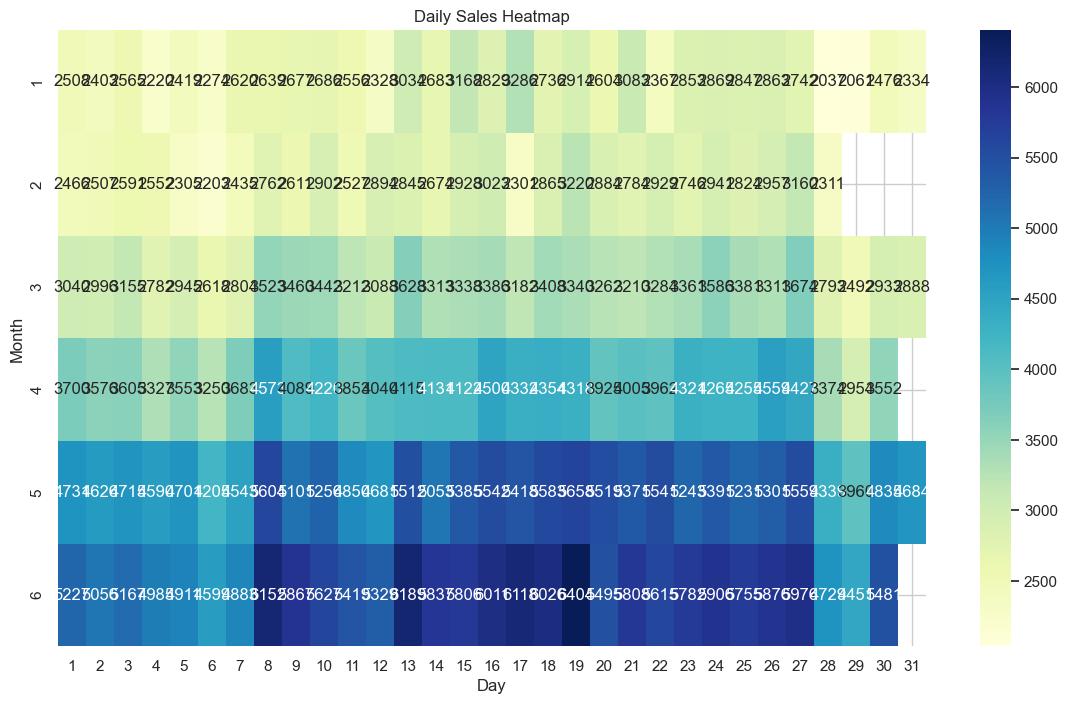

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'transaction_date' to datetime
daily_sales['transaction_date'] = pd.to_datetime(daily_sales['transaction_date'])

# Create 'Month' and 'Day' columns
daily_sales['Month'] = daily_sales['transaction_date'].dt.month
daily_sales['Day'] = daily_sales['transaction_date'].dt.day

# Create a pivot table for the heatmap
daily_sales_pivot = daily_sales.pivot_table(index='Month', columns='Day', values='Total_Sales', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(daily_sales_pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Daily Sales Heatmap')
plt.show()


C:\Users\engah\AppData\Local\Temp\ipykernel_32384\1002010801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='Weekday_Weekend', y='Total_Sales', palette='coolwarm')


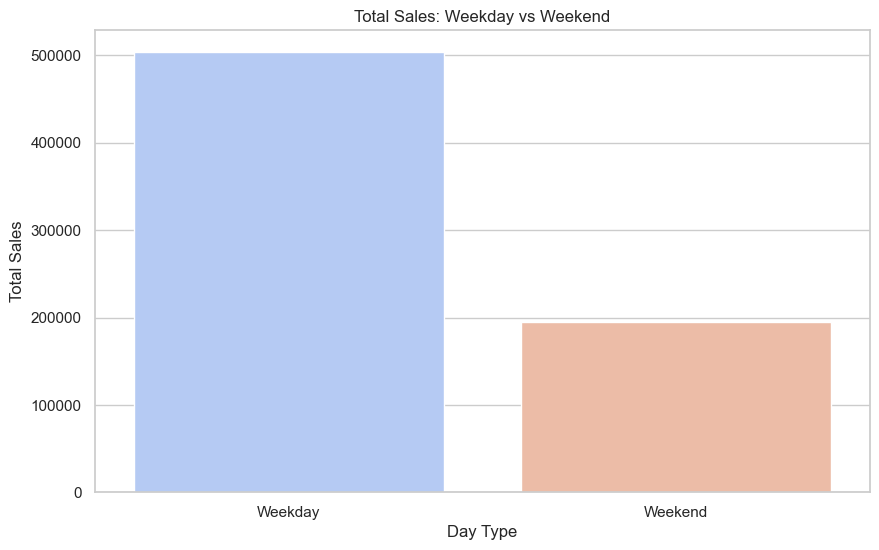

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='Weekday_Weekend', y='Total_Sales', palette='coolwarm')
plt.title('Total Sales: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Total Sales')
plt.show()


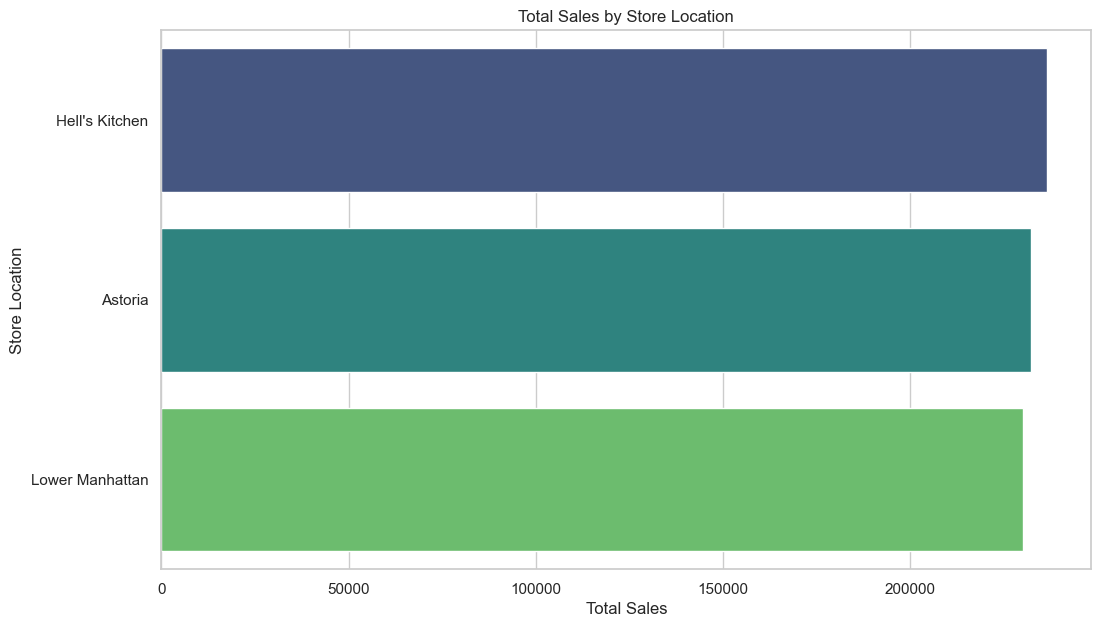

In [52]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=sales_by_location.sort_values(by='Total_Sales', ascending=False),
    y='store_location', 
    x='Total_Sales', 
    palette='viridis', 
    hue='store_location',  # Assign `y` to `hue`
    dodge=False,  # Ensure bars are not split by `hue`
    legend=False  # Remove legend since it's unnecessary here
)
plt.title('Total Sales by Store Location')
plt.xlabel('Total Sales')
plt.ylabel('Store Location')
plt.show()


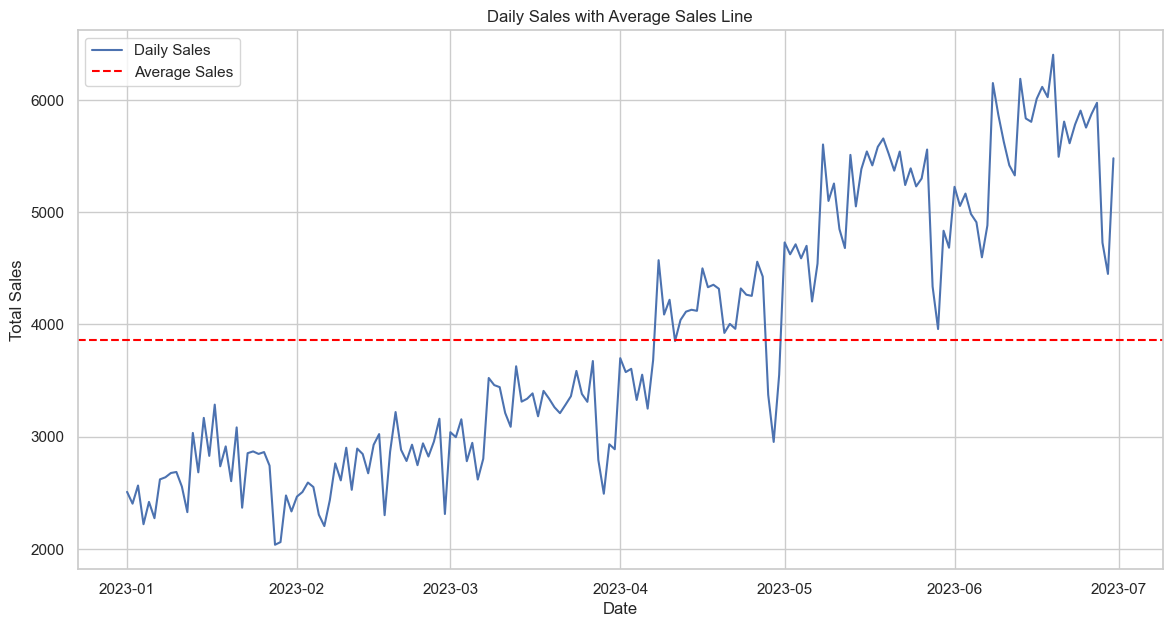

In [54]:
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['transaction_date'], daily_sales['Total_Sales'], label='Daily Sales')
plt.axhline(average_daily_sales, color='red', linestyle='--', label='Average Sales')
plt.title('Daily Sales with Average Sales Line')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


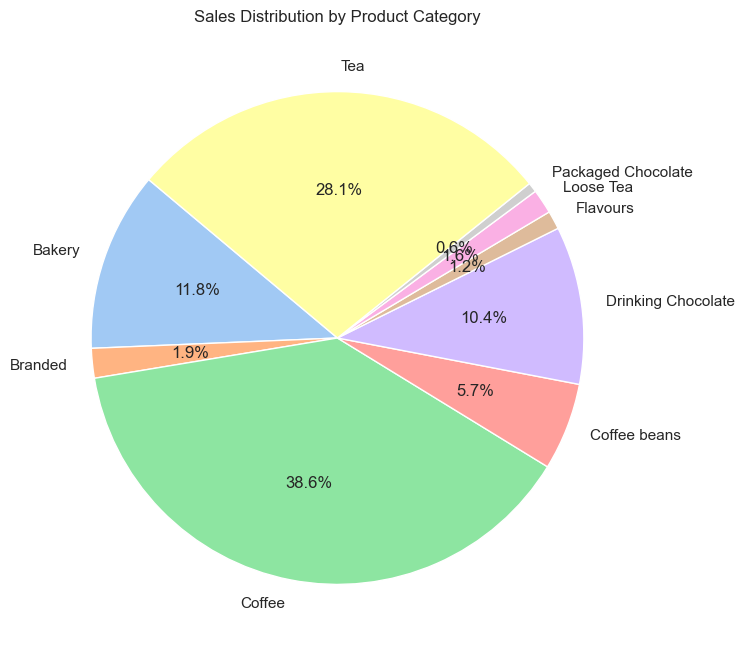

In [56]:
plt.figure(figsize=(10, 8))
plt.pie(sales_by_category['Total_Sales'], labels=sales_by_category['product_category'], 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Product Category')
plt.show()


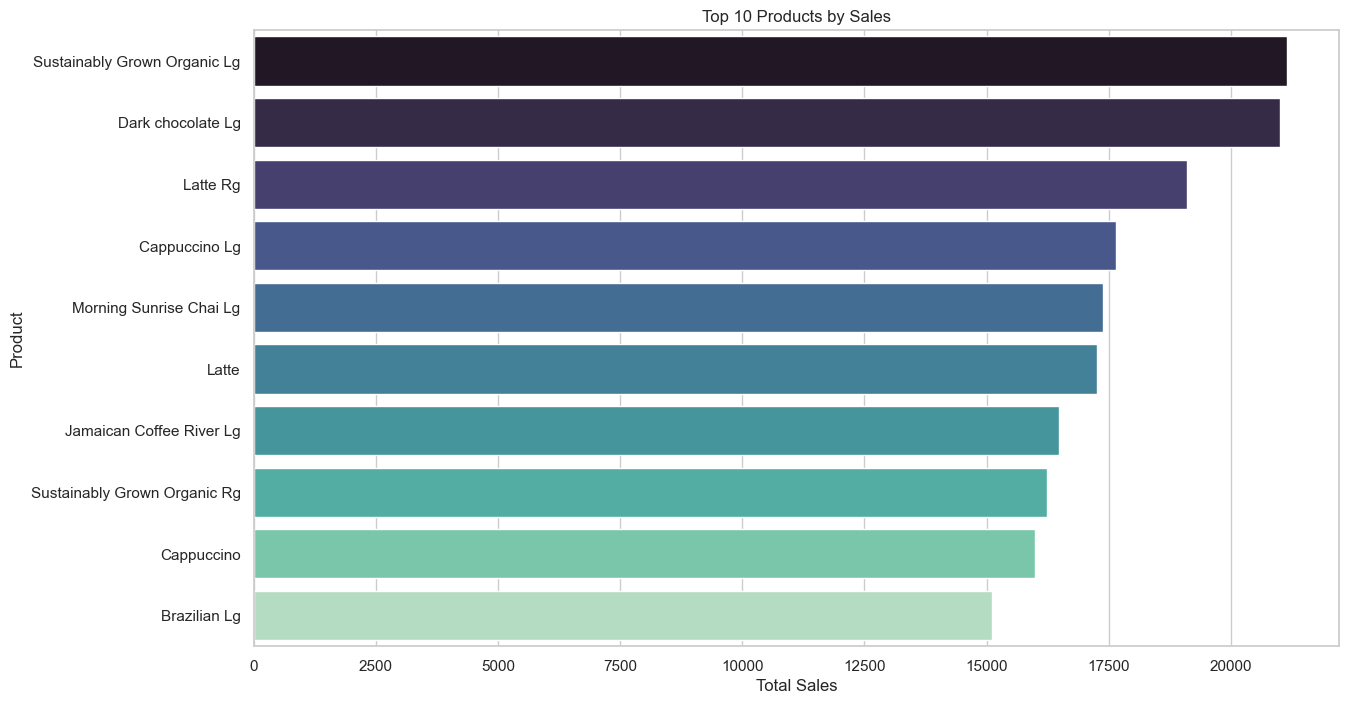

In [60]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_products,
    y='product_detail',
    x='Total_Sales',
    palette='mako',
    hue='product_detail',  # Assign `y` to `hue`
    dodge=False,
    legend=False
)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()


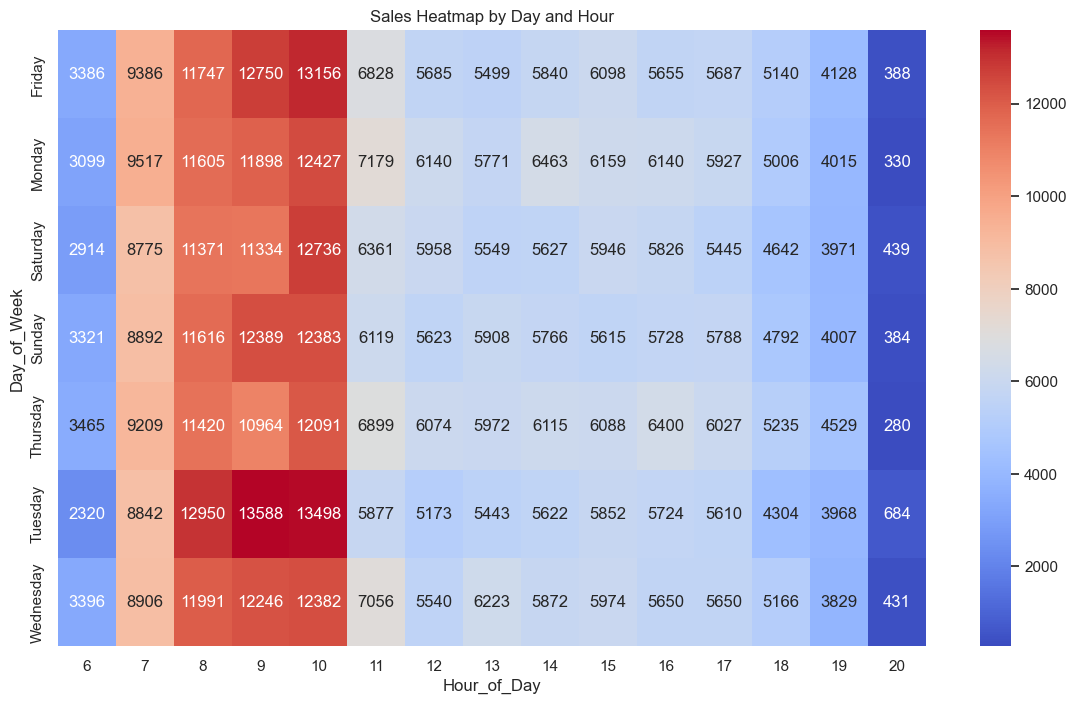

In [66]:
sales_by_hour_pivot = sales_by_hour.pivot(index='Day_of_Week', columns='Hour_of_Day', values='Total_Sales')

plt.figure(figsize=(14, 8))
sns.heatmap(sales_by_hour_pivot, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Sales Heatmap by Day and Hour')
plt.show()


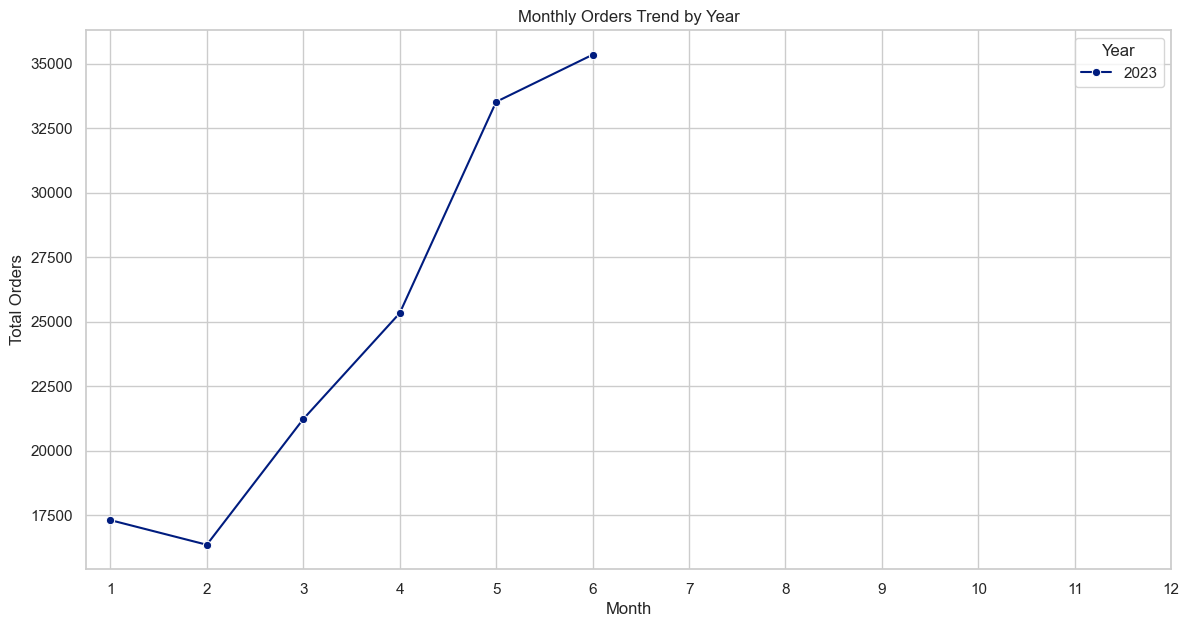

In [68]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_orders, x='Month', y='Total_Orders', hue='Year', marker='o', palette='dark')
plt.title('Monthly Orders Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.xticks(range(1, 13))
plt.show()


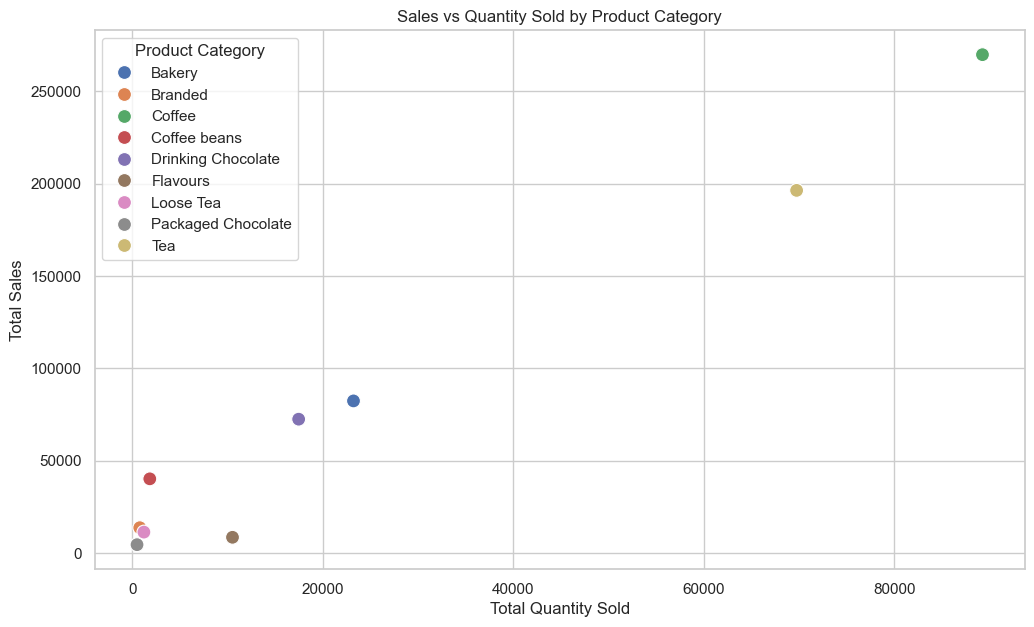

In [70]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=sales_by_category, x='Total_Quantity_Sold', y='Total_Sales', hue='product_category', s=100)
plt.title('Sales vs Quantity Sold by Product Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.show()


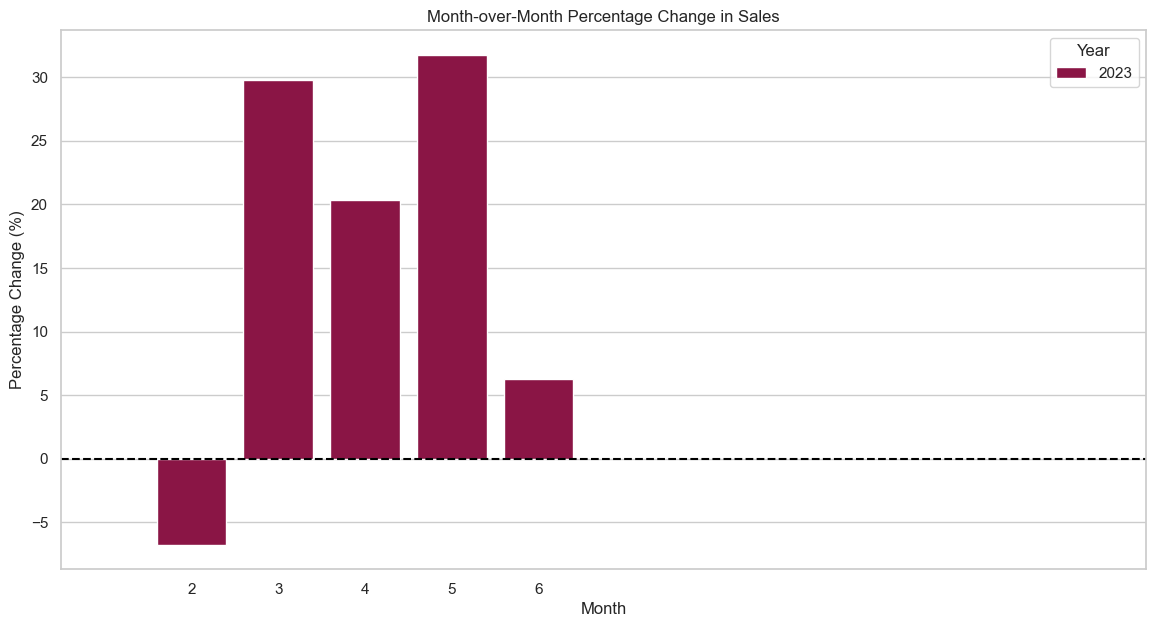

In [72]:
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_sales, x='Month', y='MoM_Percentage_Change', hue='Year', palette='Spectral')
plt.title('Month-over-Month Percentage Change in Sales')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(range(1, 13))
plt.axhline(0, color='black', linestyle='--')
plt.show()
